In [1]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re

# chargement et affichage des données
data = pd.read_csv('D:\Dev\Mes fichiers Python\Fichiers de données\operation_modifiee.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [2]:
data.loc[155, 'categ'] = 'FACTURE TELEPHONE'
data.loc[156, 'categ'] = 'COTISATION BANCAIRE'
data.iloc[155:165,:]

,date_operation,libelle,montant,solde_avt_ope,categ
155,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,FACTURE TELEPHONE
156,2023-07-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,3259.20,COTISATION BANCAIRE
157,2023-07-07,CARTE XX XX XX XX XX,-29.20,3257.28,AUTRE
158,2023-07-10,CARTE XX XX LA CCNCF XX,-53.10,3228.08,TRANSPORT
159,2023-07-10,CARTE XX XX XX XX LA CCNCF XX,-1.53,3174.98,TRANSPORT
160,2023-07-10,CARTE XX XX XX XX XX,-9.52,3173.45,AUTRE
161,2023-07-10,CARTE XX XX XX XX LA CCNCF XX,-1.08,3163.93,TRANSPORT
162,2023-07-11,CARTE XX XX CHEZ LUC XX,-14.40,3162.85,RESTAURANT
163,2023-07-12,CARTE XX XX XX XX,-8.00,3148.45,AUTRE
164,2023-07-13,CARTE XX XX TOUPTIPRI XX,-9.88,3140.45,COURSES


In [4]:
data['date_operation'] = pd.to_datetime(data['date_operation'], errors='coerce')
data.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

In [4]:
categorie = data.categ.value_counts().reset_index()
categorie.rename(columns={'index':'Type de dépenses'}, inplace=True)
categorie.rename(columns={'categ':"Nombre d'opérations"}, inplace=True)
categorie['Fréquence'] = (categorie["Nombre d'opérations"])/((categorie["Nombre d'opérations"]).sum())
categorie['Fréquence']=round((categorie['Fréquence']),2)

categorie

,Type de dépenses,Nombre d'opérations,Fréquence
0,AUTRE,212,0.69
1,COURSES,39,0.13
2,TRANSPORT,21,0.07
3,RESTAURANT,16,0.05
4,FACTURE TELEPHONE,7,0.02
5,COTISATION BANCAIRE,7,0.02
6,LOYER,6,0.02


In [5]:
#x = categorie['Type de dépenses']
#categorie['Moyenne']=data.loc[data['categ']==x,'montant'].mean().reset_index()
#categorie

In [6]:
"{:.2%}".format(0.69)

'69.00%'

In [7]:
# normalize=True --> donne la valeur en fréquence
data["categ"].value_counts(normalize=True)

AUTRE                  0.688312
COURSES                0.126623
TRANSPORT              0.068182
RESTAURANT             0.051948
FACTURE TELEPHONE      0.022727
COTISATION BANCAIRE    0.022727
LOYER                  0.019481
Name: categ, dtype: float64

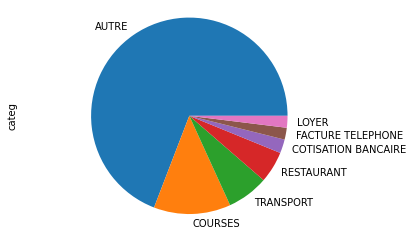

In [5]:
import matplotlib.pyplot as plt

# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

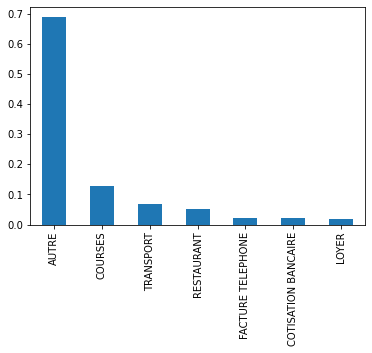

In [9]:
# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [6]:
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

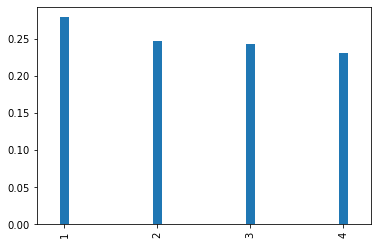

In [7]:
# Diagramme en bâtons qui montre la proportion des dépenses dans le mois (divisé en 4 parties)
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

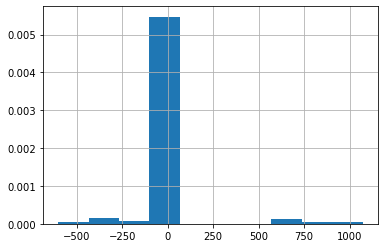

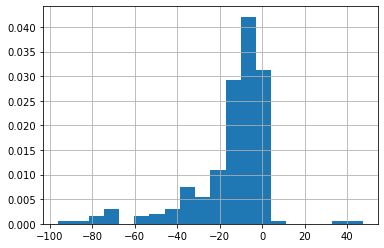

In [12]:
# Histogramme
data["montant"].hist(density=True)
plt.show()

# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

In [16]:
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

In [14]:
tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

In [15]:
# Découvrez les mesures de tendance centrale
data['montant'].mode()

0   -1.6
Name: montant, dtype: float64

In [7]:
data['montant'].mean()

2.8725649350649407

In [8]:
data['montant'].median()

-9.6

In [19]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [17]:
data.pivot_table(columns = 'categ', values = 'montant', aggfunc = ('median','mean'))

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT
mean,23.433208,-1.885714,-16.341282,-12.045714,-345.0,-10.3325,-52.997143
median,-8.310000,-1.920000,-12.240000,-7.020000,-345.0,-10.1000,-53.100000


In [27]:
data.loc[data['categ']=='COTISATION BANCAIRE','montant'].sum()

-13.2

--------------------
AUTRE
moy:
 23.433207547169832
med:
 -8.31
mod:
 0   -1.6
Name: montant, dtype: float64


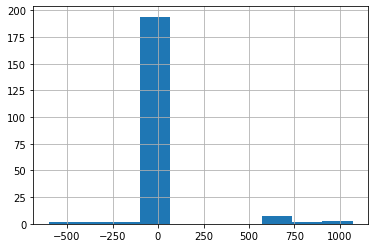

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64


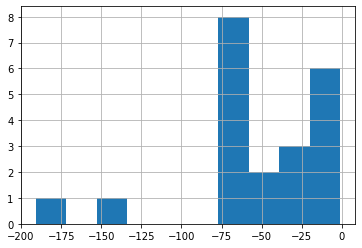

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64


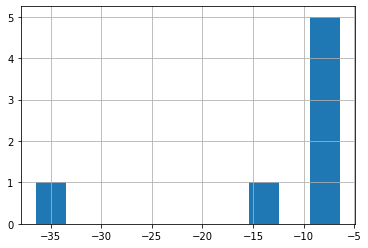

--------------------
COURSES
moy:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64


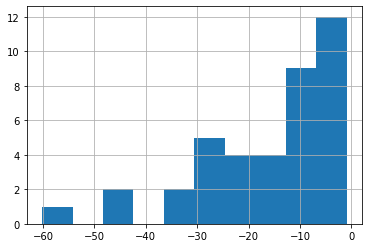

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64


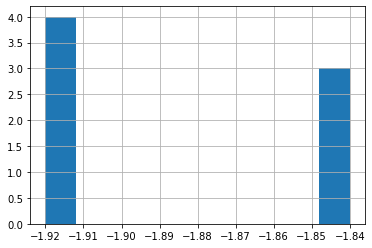

--------------------
RESTAURANT
moy:
 -10.332500000000001
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64


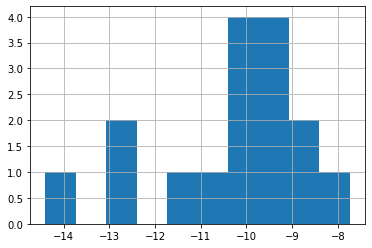

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64


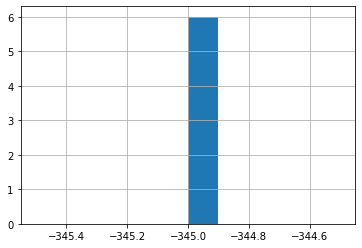

In [67]:
for cat in data["categ"].unique():
    subset = data.loc[data.categ == cat, :] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    subset["montant"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

AUTRE
212 transactions
moyenne :  23.433207547169832
médiane :  -8.31
mode :  0   -1.6
Name: montant, dtype: float64
écart-type :  201.47780984467025
variance :  40593.3078598051
Skewness empirique :  3.1215325222336423
Kurtosis empirique :  12.716537970826295


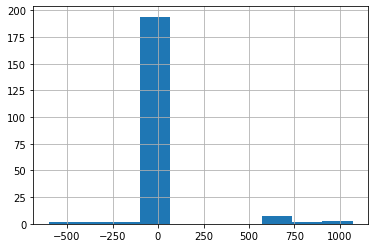

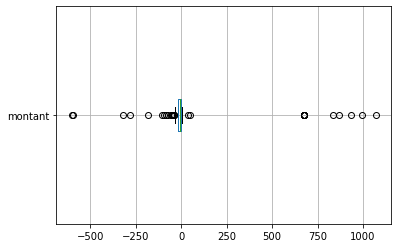

TRANSPORT
21 transactions
moyenne :  -52.99714285714286
médiane :  -53.1
mode :  0   -73.0
Name: montant, dtype: float64
écart-type :  48.11722884194987
variance :  2315.267711428572
Skewness empirique :  -1.248265076217821
Kurtosis empirique :  2.1922705326917495


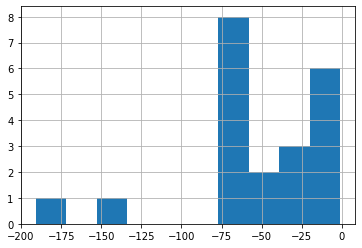

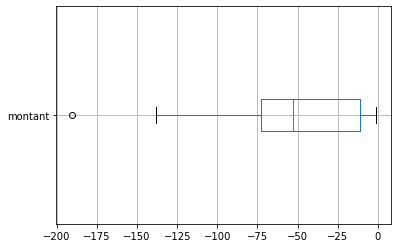

FACTURE TELEPHONE
7 transactions
moyenne :  -12.045714285714283
médiane :  -7.02
mode :  0   -7.02
1   -6.38
Name: montant, dtype: float64
écart-type :  11.068975949537
variance :  122.52222857142853
Skewness empirique :  -2.3876514564281526
Kurtosis empirique :  5.798563367885492


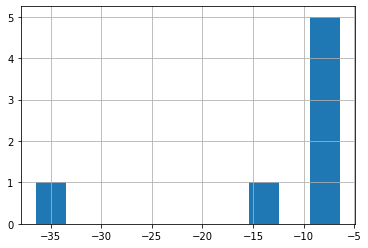

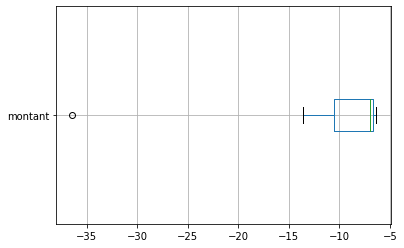

COURSES
39 transactions
moyenne :  -16.341282051282054
médiane :  -12.24
mode :  0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
écart-type :  13.479017647222777
variance :  181.68391673414305
Skewness empirique :  -1.2467488306456977
Kurtosis empirique :  1.604730494087499


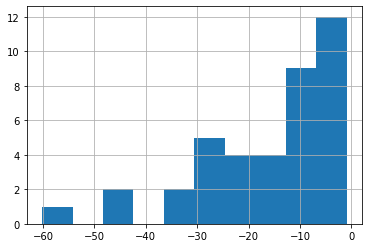

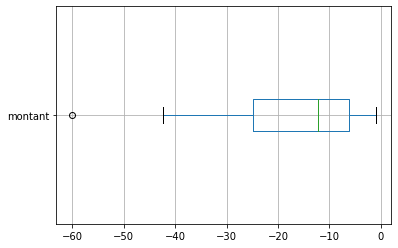

COTISATION BANCAIRE
7 transactions
moyenne :  -1.8857142857142857
médiane :  -1.92
mode :  0   -1.92
Name: montant, dtype: float64
écart-type :  0.04276179870598782
variance :  0.0018285714285714218
Skewness empirique :  0.37416573867739106
Kurtosis empirique :  -2.800000000000003


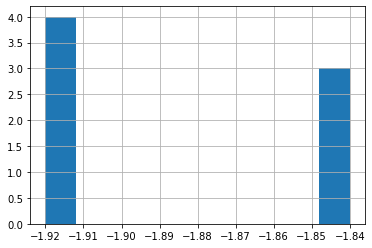

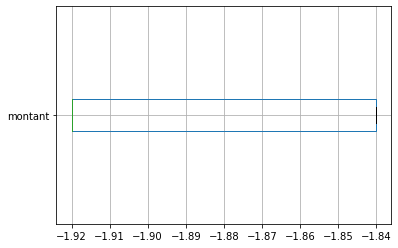

RESTAURANT
16 transactions
moyenne :  -10.332500000000001
médiane :  -10.1
mode :  0   -9.2
Name: montant, dtype: float64
écart-type :  1.7445362325462512
variance :  3.0434066666666677
Skewness empirique :  -0.8883503487158837
Kurtosis empirique :  0.5988855591691937


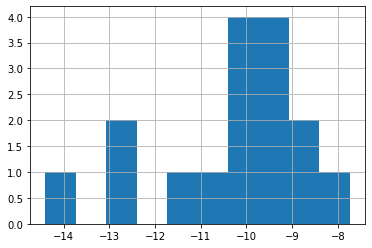

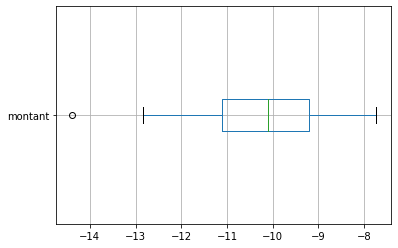

LOYER
6 transactions
moyenne :  -345.0
médiane :  -345.0
mode :  0   -345.0
Name: montant, dtype: float64
écart-type :  0.0
variance :  0.0
Skewness empirique :  0
Kurtosis empirique :  0


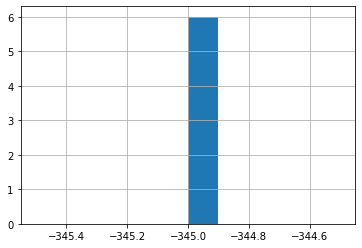

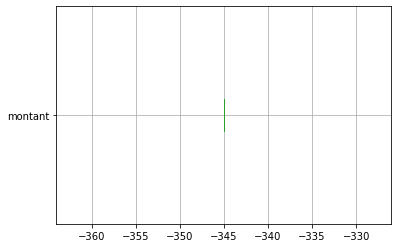

In [6]:
# pour la boucle, on créé sa liste : data.categ.unique()
for categg in data.categ.unique():
    liste_montant = data.loc[data['categ']==categg,:]
    print(categg)
    print(len(liste_montant['montant']),'transactions')
    print('moyenne : ', liste_montant['montant'].mean())
    print('médiane : ', liste_montant['montant'].median())
    print('mode : ', liste_montant['montant'].mode())
    print("écart-type : ", liste_montant['montant'].std())
    print("variance : ", liste_montant['montant'].var())
    print("Skewness empirique : ", liste_montant['montant'].skew())
    print("Kurtosis empirique : ", liste_montant['montant'].kurtosis())
    liste_montant['montant'].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme
    liste_montant.boxplot(column='montant', vert=False)
    plt.show()

In [85]:
# variance empirique
data['montant'].var()

31007.638040630973

In [86]:
# variance empirique sans biais
data['montant'].var(ddof=0)

30906.963891148403

In [88]:
data['montant'].mean()

2.8725649350649407

In [20]:
# écart type
data['montant'].std()

176.08985785851203

In [93]:
(data['montant'].std())/(data['montant'].mean())

61.30056651079017

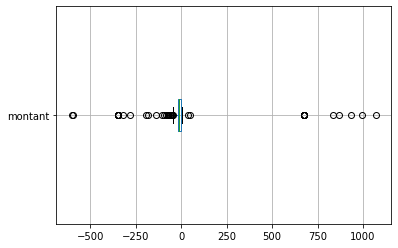

In [94]:
# boite à moustaches
data.boxplot(column="montant", vert=False)
plt.show()

In [19]:
# Le Skewness empirique
# γ1=μ3/s3 avec μ3=1n∑ni=1(xi−x¯¯¯)3
# Si γ1=0 alors la distribution est symétrique. --> Mode=Med=x¯¯¯ 
# Si γ1>0 alors la distribution est étalée à droite. --> Mode<Med<x¯¯¯ 
# Si γ1<0 alors la distribution est étalée à gauche. --> Mode>Med>x¯¯¯
data['montant'].skew()

3.3618450105098843

In [21]:
# Le Kurtosis empirique
# on compare l'aplatissement par rapport à la distribution la plus célèbre, appelée distribution normale
# γ2=μ4/s4−3
#  μ4=1n∑ni=1(xi−x¯¯¯)4
# Si γ2=0 , alors la distribution a le même aplatissement que la distribution normale.
# Si γ2>0 , alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées
# Si γ2<0 , alors les observations sont moins concentrées : la distribution est plus aplatie.
data['montant'].kurtosis()

17.2719048282677

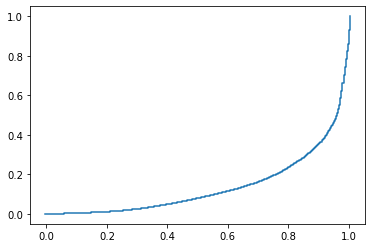

In [14]:
# Courbe de Lorenz
# Mesure la concentration des valeurs d'un échantillon 
# Pour notre exemple, donne un indicateur de la disparités des dépenses
# si toutes les dépenses ont la même valeurs la courbe sera proche de la bissectrice : droite f(x)=x
# si il y a de grosses disparités elle ressemblera plus à une exponentielle

depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0, on assigne une valeur de départ à la liste

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [29]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
# gini : 2 x l'air entre la 1ere bissectrice et la courbe de Lorenz
gini = 2*S
gini
# plus gini est élevé (et se rapproche de 1), plus il y a de grosses disparités dans les valeurs 

0.7204386813739185

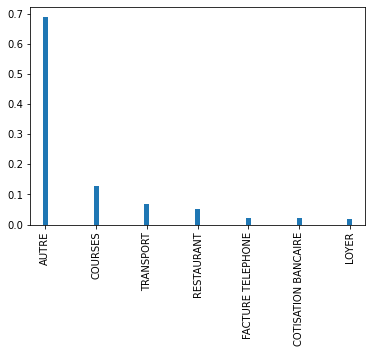

In [30]:
data["categ"].value_counts(normalize=True).plot(kind='bar',width=0.1)

plt.show()

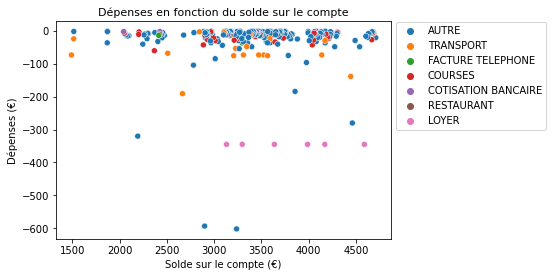

In [9]:
# nuage de point montant en fonction de solde_avt_ope
import seaborn as sns
#plt.scatter(data['solde_avt_ope'], data['montant'])
depenses = data.loc[data['montant']<0,:]
sns.scatterplot(data=depenses, x='solde_avt_ope', y='montant', hue='categ')
plt.title("Dépenses en fonction du solde sur le compte", fontsize = 11)
plt.ylabel("Dépenses (€)")
plt.xlabel("Solde sur le compte (€)")
plt.legend(bbox_to_anchor=(1, 1.02))

In [18]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ,quart_mois,classe_solde_compte
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,4,"[1500,2000["
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,1,"[1500,2000["
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,1,"[0,1500["
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE,1,"[0,1500["
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE,1,"[2000,2500["


In [33]:
index=0
for solde in data['solde_avt_ope']:
    if solde<1500:
        classe_solde_compte = '[0,1500['
    elif 1500<=solde<2000 : 
        classe_solde_compte = '[1500,2000['
    elif 2000<=solde<2500 : 
        classe_solde_compte = '[2000,2500['
    elif 2500<=solde<3000 : 
        classe_solde_compte = '[2500,3000['
    elif 3000<=solde<3500 : 
        classe_solde_compte = '[3000,3500['
    elif 3500<=solde<4000 : 
        classe_solde_compte = '[3500,4000['
    else : 
        classe_solde_compte = '[4000,4500+['
    data.loc[index,'classe_solde_compte']=classe_solde_compte
    index = index +1


data.head()

,date_operation,libelle,montant,solde_avt_ope,categ,classe_solde_compte
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,"[1500,2000["
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,"[1500,2000["
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,"[0,1500["
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE,"[0,1500["
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE,"[2000,2500["


[1500,2000[
5


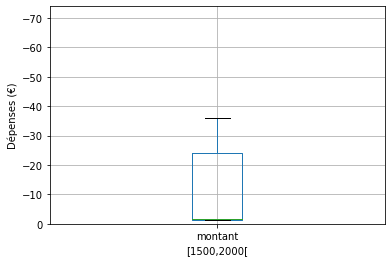

[0,1500[
1


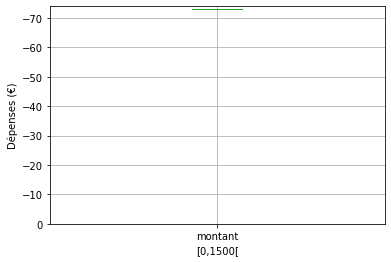

[2000,2500[
30


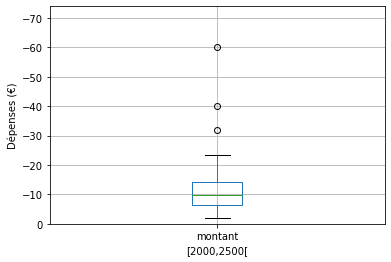

[3000,3500[
86


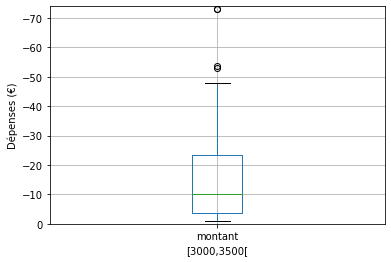

[2500,3000[
30


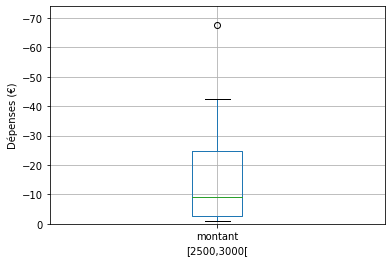

[3500,4000[
74


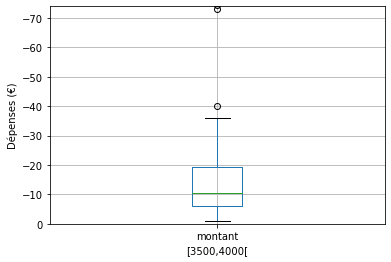

[4000,4500[
65


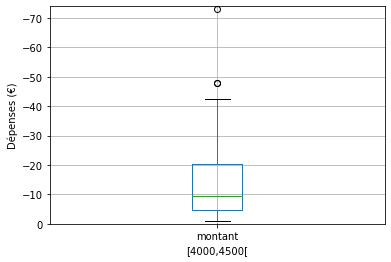

In [33]:
depenses = data.loc[data['montant']<0,:]
for classe in data.classe_solde_compte.unique():
    montant_classe = depenses.loc[depenses['classe_solde_compte']==classe,:]
    montant_classe.boxplot(column='montant', vert=True)
    print(classe)
    print(len(montant_classe))
    plt.ylabel("Dépenses (€)")
    plt.xlabel(classe)
    plt.ylim(0, -74)
    plt.show()

In [37]:
#data.loc[data['classe_solde_compte']=='[0,1500[',:]
data.loc[data['solde_avt_ope']<2000,:]

,date_operation,libelle,montant,solde_avt_ope,categ,classe_solde_compte
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,"[1500,2000["
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,"[1500,2000["
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,"[0,1500["
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE,"[0,1500["
298,2023-09-26,CARTE XX XX XX XX XX,-1.20,1871.58,AUTRE,"[1500,2000["
299,2023-09-29,DON XX XX XX XX XX XX XX,-1.76,1870.38,AUTRE,"[1500,2000["
300,2023-09-30,XX XX VIREMENT XX XX XX,-36.00,1868.62,AUTRE,"[1500,2000["
301,2023-10-02,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1832.62,AUTRE,"[1500,2000["


In [12]:
depenses = data.loc[data['montant']<0,:]
classe_solde_compte_array=[]
classe_array=[]
data_solde_croissant=data.sort_values('solde_avt_ope')

for classe in data_solde_croissant.classe_solde_compte.unique():
    montant_classe = depenses.loc[depenses['classe_solde_compte']==classe,'montant']
    print(classe)
    montant_classe_array=montant_classe.to_numpy()
    print(montant_classe_array)
    classe_solde_compte_array.append(montant_classe_array)
    classe_array.append(classe)
    
print(classe_solde_compte_array)   
print(classe_array)



AttributeError: 'DataFrame' object has no attribute 'classe_solde_compte'

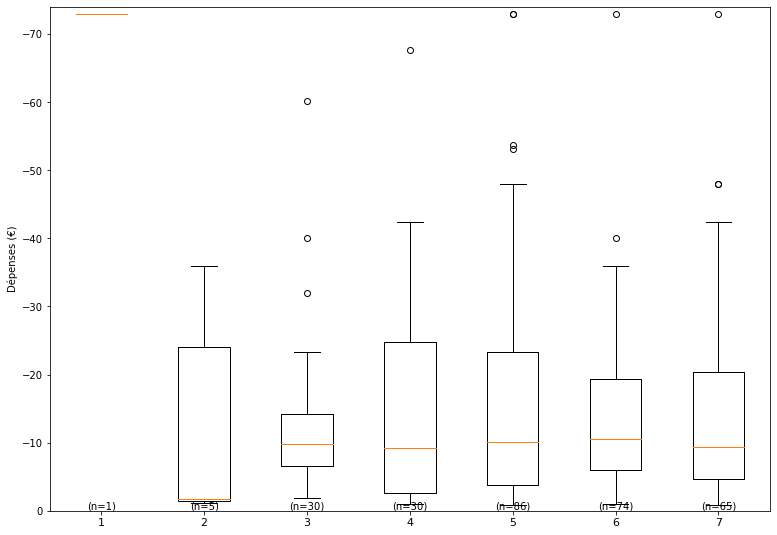

In [68]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(classe_solde_compte_array)

plt.ylabel("Dépenses (€)")
#plt.xlabel(classe_array)
plt.ylim(0, -74)

plt.xticks(fontsize = 11)
# show plot

position = [1,2,3,4,5,6,7]
texte = len(classe_solde_compte_array)
z=0
for x in position :
    plt.text(x ,0,"(n={})".format(len(classe_solde_compte_array[z])),horizontalalignment='center',verticalalignment='bottom') 
    z=z+1

plt.show()

In [18]:
classe_array[1]

'[0,1500['

In [101]:
np.arange(1500,5000,500)

array([1500, 2000, 2500, 3000, 3500, 4000, 4500])

In [15]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ,classe_solde_compte
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,"[1500,2000["
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,"[1500,2000["
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,"[0,1500["
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE,"[0,1500["
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE,"[2000,2500["


In [10]:
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe

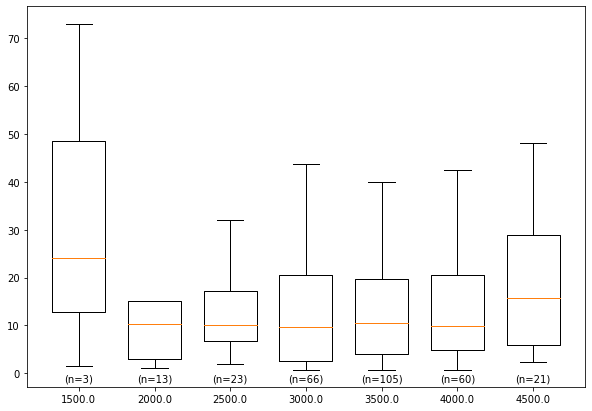

In [11]:
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

In [12]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])

0.010068819133759194
484.95954154532853


In [18]:
# Analysez deux variables quantitatives par régression linéaire

# on créé un droite de tendance de type ax+b en fonction de la dispersion des points, on peut rajouter un epsilon (ax+b+e) pour ajouter un coefficient d'erreur
# cette droite permettra ensuite de faire des prédictions

import datetime as dt

# Selection du sous-échantillon
courses = data[data.categ == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant":a, "attente":b})

In [71]:
courses.head()

,montant,attente
date_operation,,
2023-04-10,42.42,5
2023-04-25,32.67,15
2023-04-26,1.90,1
2023-04-28,9.11,2
2023-05-02,12.24,4


In [19]:
import statsmodels.api as sm
Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']

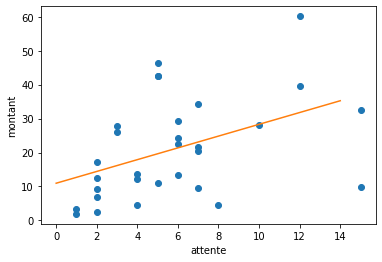

In [73]:
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

In [20]:
# Analysez une variable quantitative et une qualitative par ANOVA

X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

AUTRE : moyenne = 23.48 
 196 éléments
 xi = 0.3964629430719775
TRANSPORT : moyenne = 53.0 
 21 éléments
 xi = 29.914932330827078
FACTURE TELEPHONE : moyenne = 7.97 
 6 éléments
 xi = -15.108877192982451
COURSES : moyenne = 16.34 
 39 éléments
 xi = -6.74092847503373
COTISATION BANCAIRE : moyenne = 1.89 
 7 éléments
 xi = -21.196496240601498
RESTAURANT : moyenne = 10.33 
 16 éléments
 xi = -12.749710526315782
23.082210526315784


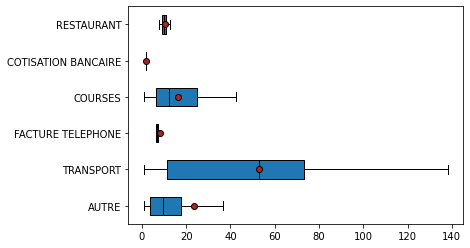

In [57]:
modalites = sous_echantillon[X].unique()
groupes = []
n=0
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    print(m,':','moyenne =',round((groupes[n].mean()),2),
            '\n',len(groupes[n]),'éléments\n',
         'xi =',(groupes[n].mean())-(sous_echantillon['montant'].mean()))
    n=n+1
print (sous_echantillon['montant'].mean())

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()


In [19]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.02805598513593744

In [22]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ,quart_mois
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,4
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,1
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,1
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE,1
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE,1


In [13]:
# analyser les dépenses en fonction de la période du mois, càd dépenses en fonction de quart_mois
depenses.head()

,date_operation,libelle,montant,solde_avt_ope,categ,quart_mois
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,4
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,1
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,1
5,2023-04-03,CARTE XX XX XX XX,-14.39,2097.61,AUTRE,1
6,2023-04-05,CARTE XX XX XX XX XX,-15.20,2083.22,AUTRE,1


In [15]:
X = "quart_mois" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]

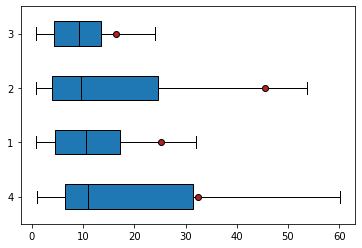

In [16]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [17]:
X = "quart_mois" # qualitative
Y = "montant" # quantitative

sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

# cette fonction calcule le rapport de corrélation entre les 2 variables 
# s'il est proche de 0, peut de corrélation, beaucoup de corrélation à priori s'il est proche de 1
# η2Y/X=Vinterclasses/Vtotale
# cad rapport de corrélation = Variation interclasse / Variation totale

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.020519008455201417

In [59]:
# Analysez deux variables qualitatives avec le Chi-2

X = "quart_mois"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,56.0,7.0,6.0,5.0,NaN,3.0,9.0,86
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75
4,52.0,NaN,15.0,NaN,NaN,2.0,2.0,71
Total,213.0,7.0,39.0,6.0,6.0,16.0,21.0,308


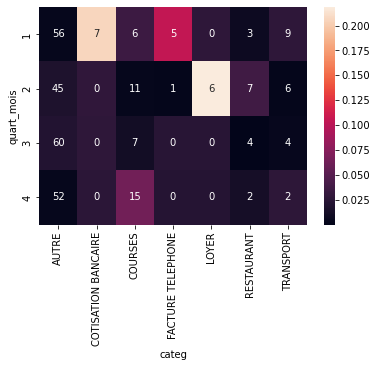

63.11951286262324


In [61]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
